In [1]:
# Load packages
import data_prep_func as prep

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib
import math
from math import e
import mne

import tensorflow as tf
from tensorflow import keras

import os
import sys

In [2]:
# Function to read all the files matching the requirements
def read_target_list(class_list):
    file_read_list = [];
    for file_name in file_list:
        if file_name[0:2] in test_number_list_sub and file_name[-3:] == 'set' and file_name[:-4] + '.fdt' in file_list and file_name[-5] in class_list:
            file_read_list.append(file_name)
    return file_read_list

In [23]:
# Read the file list and define the studied channels
ch_valid_32 = ['FP2', 'AF3', 'AF8', 'F6', 'F7', 'FC4', 'FC5', 'C2', 'C3', 'CZ', 'CP1', 'CP2', 'CP3', 'CP5', 'CP6', 'FT7', 'T8', 'P3', 'P5', 'P6', 'P7', 'P8', 'FC4', 'C6', 'CP4', 'PO5', 'PO7', 'PO6', 'PO8', 'O1', 'OZ', 'O2'] # channel names for extracting features

ch_valid_test = ch_valid_32

folder_path = "/Users/yiyuan/OneDrive - University of Essex/PG Research/3_Data/Rename/"
file_list = os.listdir(folder_path)


test_number_list = ['08', '22', '23', '24', '25', '29', '30', '41']
test_number_list_sub = ['08', '23', '41']

file_read_list = read_target_list(['O', 'C', 'H'])

data_clips = np.empty(shape=(0,20,len(ch_valid_test),len(ch_valid_test),3))
data_frames = np.empty(shape=(0,len(ch_valid_test),len(ch_valid_test),3))

frame_subject = []
frame_label = []
clip_subject = []
clip_label = []

# Read the data from the specific file list
for file_read in file_read_list:
    file_path_temp = folder_path + file_read
    data_clip_temp, data_frame_temp, frame_label_temp, frame_subject_temp, clip_label_temp, clip_subject_temp = prep.create_ISPC_dataset(file_path=file_path_temp, subject=int(file_read[:2]), tag=file_read[-5], ch_valid=ch_valid_test)

    data_frames = np.concatenate((data_frames, data_frame_temp), 0)
    data_clips = np.concatenate((data_clips,data_clip_temp), 0)
    frame_subject = frame_subject + frame_subject_temp
    frame_label = frame_label + frame_label_temp
    clip_subject = clip_subject + clip_subject_temp
    clip_label = clip_label + clip_label_temp


ata in 1 contiguous segment
Setting up band-pass filter from 9 - 11 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 9.00
- Lower transition bandwidth: 2.25 Hz (-6 dB cutoff frequency: 7.88 Hz)
- Upper passband edge: 11.00 Hz
- Upper transition bandwidth: 2.75 Hz (-6 dB cutoff frequency: 12.38 Hz)
- Filter length: 735 samples (1.470 sec)

Reading /Users/yiyuan/OneDrive - University of Essex/PG Research/3_Data/Rename/41IA_BL2C.fdt
Reading 0 ... 75350  =      0.000 ...   150.700 secs...
/Users/yiyuan/OneDrive - University of Essex/PG Research/2_Codes/2021_transfer learning/transfer_learning_py_2021/data_prep_func.py:78: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data_raw = mne.io.rea

In [160]:
np.savez("test_frame", data_frames=data_frames, frame_label=frame_label, frame_subject=frame_subject)
np.savez("test_clip", data_clips=data_clips, clip_label=clip_label, clip_subject=clip_subject)

In [161]:
np.load("test_clip.npz")

In [37]:
print(3 in clip_label)

True


In [25]:
data_tuple = data_clips
data_subject = clip_subject
data_label = clip_label

In [26]:
# Shuffle the dataset and labels and write them into the practical variables
indices = np.arange(data_clips.shape[0])
np.random.shuffle(indices) # Shuffle the indices

# Initialize the data variables
data_tuple = np.zeros(shape=data_clips.shape)
data_subject = []
data_label = []

# Write the values in the new random order
k = 0
for i in indices:
    data_tuple[k] = data_clips[i]
    data_subject = data_subject + [clip_subject[i]]
    data_label = data_label + [clip_label[i]]
    k = k + 1


In [17]:
# Initialize the lists of training and testing dataset
subject_indices_train = []
subject_indices_test = []
test_subject = []
train_subject = []
test_label = []
train_label = []
test_target = 8

# Get the indices of corresponding subjects from the subject list
for index in range(len(data_subject)):
    if data_subject[index] == test_target:
        subject_indices_test.append(index)
        test_subject.append(data_subject[index])
        test_label.append(data_label[index])
    else:
        subject_indices_train.append(index)
        train_subject.append(data_subject[index])
        train_label.append(data_label[index])

# Create the train and test tuple and label lists
train_tuple = data_tuple[subject_indices_train]
test_tuple = data_tuple[subject_indices_test]

In [27]:
from tensorflow.keras import layers 
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
y = clip_label
X = data_tuple

In [98]:
y = np.asarray(list(zip(y)))

In [ ]:
################## Model building #######################
### Content
## 3-D CNN
## RNN
# LSTM
# GRU
## TimesFormer
# K400
# SSv2

In [165]:
label_classes = np.zeros(shape=(len(train_label),5))
for index in range(len(train_label)):
    if data_label[index] == 0:
        label_classes [index] = [1, 0, 0, 0, 0]
    elif data_label[index] == 1:
        label_classes [index] =  [0, 1, 0, 0, 0]
    elif data_label[index] == 2:
        label_classes [index] =  [0, 0, 1, 0, 0]
    elif data_label[index] == 3:
        label_classes [index] =  [0, 0, 0, 1, 0]
    else:
        label_classes [index] =  [0, 0, 0, 0, 1]

In [166]:
# Set the data for training and testing before transfer learning
X = train_tuple
y = label_classes
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [167]:
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

(1661, 20, 32, 32, 3) 1661
(416, 20, 32, 32, 3) 416


Epoch 1/5
52/52 [==============================] - 49s 931ms/step - loss: 9.8790 - accuracy: 0.1210
Epoch 2/5
52/52 [==============================] - 52s 991ms/step - loss: 10.4072 - accuracy: 0.3109
Epoch 3/5
52/52 [==============================] - 49s 937ms/step - loss: 9.7579 - accuracy: 0.3323
Epoch 4/5
52/52 [==============================] - 48s 927ms/step - loss: 8.3008 - accuracy: 0.2156
Epoch 5/5
52/52 [==============================] - 48s 929ms/step - loss: 9.4925 - accuracy: 0.3279


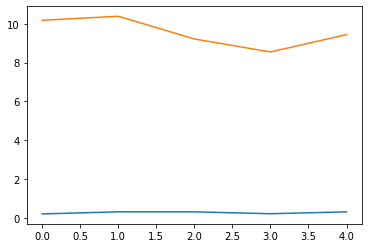

In [173]:
# 3-D CNN
####### Model ########
dim = (20, 32, 32, 3)
input_shape = (dim)
Input_words = layers.Input(shape=input_shape, name='inpud_vid')
# CNN
x = layers.Conv3D(filters=64, kernel_size=(8,8,8), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(8,8,8))(x)
x = layers.Conv3D(filters=32, kernel_size=(4,4,4), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(4,4,4))(x)
x = layers.Conv3D(filters=16, kernel_size=(2,2,2), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(2,2,2))(x)
x = layers.SpatialDropout3D(0.2)(x)
# Flatten and Batch normalization
x = layers.TimeDistributed(layers.BatchNormalization())(x)
x = layers.Flatten()(x)
out = layers.Dense(5)(x)
model_CNN = keras.Model(inputs=Input_words, outputs=[out])
opt = optimizers.Adam()
model_CNN.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['accuracy'])

# Train and test
his_CNN = model_CNN.fit(X_train, y_train, epochs=5)
pred_CNN = model_CNN.predict(X_test)
plt.plot(his_CNN.history['accuracy'])
plt.plot(his_CNN.history['loss'])

In [179]:
# FASTER-GRU
dim = (20, 32, 32, 3)
input_shape = (dim)
Input_words = layers.Input(shape=input_shape, name='inpud_vid')
# CNN
x = layers.Conv3D(filters=64, kernel_size=(8,7,7), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(8,8,3))(x)
# RNN layers
res_1_1 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(x)
res_1_2 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(res_1_1)
res_1_3 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_1_2)

res_1_1 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(res_1_3)
res_1_2 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(res_1_1)
res_1_3 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_1_2)

res_2_1 = layers.TimeDistributed(layers.GRU(128, return_sequences=True, return_state=True))(res_1_3)
res_2_2 = layers.TimeDistributed(layers.GRU(128, return_sequences=True, return_state=True))(res_2_1)
res_2_3 = layers.TimeDistributed(layers.GRU(512, return_sequences=True, return_state=True))(res_2_2)

res_2_1 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(res_2_3)
res_2_2 = layers.TimeDistributed(layers.GRU(64, return_sequences=True, return_state=True))(res_2_1)
res_2_3 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_2_2)

res_3_1 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_2_3)
res_3_2 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_3_1)
res_3_3 = layers.TimeDistributed(layers.GRU(1024, return_sequences=True, return_state=True))(res_3_2)

res_3_1 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_3_3)
res_3_2 = layers.TimeDistributed(layers.GRU(256, return_sequences=True, return_state=True))(res_3_1)
res_3_3 = layers.TimeDistributed(layers.GRU(1024, return_sequences=True, return_state=True))(res_3_2)

res_4_1 = layers.TimeDistributed(layers.GRU(512, return_sequences=True, return_state=True))(res_4_3)
res_4_2 = layers.TimeDistributed(layers.GRU(512, return_sequences=True, return_state=True))(res_4_1)
res_4_3 = layers.TimeDistributed(layers.GRU(2048, return_sequences=True, return_state=True))(res_4_2)

# Generate the output layer
x = layers.TimeDistributed(layers.BatchNormalization())(x)
x = layers.Flatten()(res_4_3)
out = layers.Dense(5)(x)
model_GRU = keras.Model(inputs=Input_words, outputs=[out])
opt = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['accuracy'])

his_GRU = model_GRU.fit(X_train, y_train, epochs=5)
pred_GRU = model_GRU.predict(X_test)
plt.plot(his_GRU.history['accuracy'])
plt.plot(his_GRU.history['loss'])

ValueError: Dimension size must be evenly divisible by 3 but is 10
	Number of ways to split should evenly divide the split dimension for '{{node split}} = Split[T=DT_FLOAT, num_split=3](split/split_dim, BiasAdd)' with input shapes: [], [?,10,192] and with computed input tensors: input[0] = <1>.

Epoch 1/5
52/52 [==============================] - 139s 3s/step - loss: 8.9029 - accuracy: 0.3308
Epoch 2/5
52/52 [==============================] - 142s 3s/step - loss: 10.7903 - accuracy: 0.4089
Epoch 3/5
52/52 [==============================] - 125s 2s/step - loss: 10.8130 - accuracy: 0.4021
Epoch 4/5
52/52 [==============================] - 125s 2s/step - loss: 10.6646 - accuracy: 0.4010
Epoch 5/5
52/52 [==============================] - 147s 3s/step - loss: 10.6245 - accuracy: 0.3984


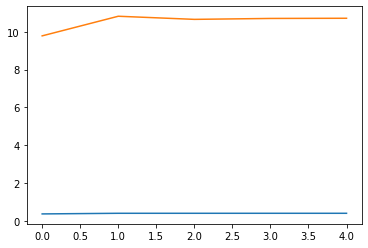

In [174]:
# LSTM + 3D CNN
dim = (20, 32, 32, 3)
input_shape = (dim)
Input_words = layers.Input(shape=input_shape, name='inpud_vid')
# CNN
x = layers.Conv3D(filters=64, kernel_size=(8,8,8), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(8,8,8))(x)
x = layers.Conv3D(filters=32, kernel_size=(4,4,4), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(4,4,4))(x)
x = layers.Conv3D(filters=16, kernel_size=(2,2,2), padding='same', activation='relu')(Input_words)
x = layers.MaxPooling3D(pool_size=(2,2,2))(x)
x = layers.SpatialDropout3D(0.2)(x)
# Flatten and Batch normalization
x = layers.TimeDistributed(layers.BatchNormalization())(x)
# x = layers.TimeDistributed(layers.Flatten())(x)
# Create the bidirectional LSTM
forward_layer = layers.LSTM(64, return_sequences=True)
backward_layer = layers.LSTM(64, activation='relu', return_sequences=True, go_backwards=True)
x = layers.TimeDistributed(layers.TimeDistributed(layers.Bidirectional(forward_layer, backward_layer=backward_layer)))(x)
# Generate the output layer
x = layers.Flatten()(x)
out = layers.Dense(5)(x)
model_LSTM = keras.Model(inputs=Input_words, outputs=[out])
opt = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['accuracy'])

# Train and test
his_LSTM = model_LSTM.fit(X_train, y_train, epochs=5)
pred_LSTM = model_LSTM.predict(X_test)
plt.plot(his_LSTM.history['accuracy'])
plt.plot(his_LSTM.history['loss'])

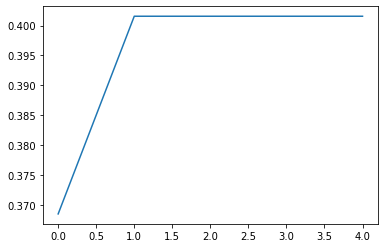

In [180]:
plt.plot(clf.history['accuracy'])

In [139]:
print(label_classes)
y = label_classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


(4171, 20, 32, 32, 3) 4171
(1043, 20, 32, 32, 3) 1043
Epoch 1/10
131/131 [==============================] - 335s 3s/step - loss: 9.8231 - accuracy: 0.4402
Epoch 2/10
131/131 [==============================] - 307s 2s/step - loss: 9.7420 - accuracy: 0.4440
Epoch 3/10
131/131 [==============================] - 303s 2s/step - loss: 9.8540 - accuracy: 0.4390
Epoch 4/10
131/131 [==============================] - 299s 2s/step - loss: 9.7806 - accuracy: 0.4371
Epoch 5/10
131/131 [==============================] - 304s 2s/step - loss: 9.7574 - accuracy: 0.4392
Epoch 6/10
131/131 [==============================] - 252s 2s/step - loss: 9.8231 - accuracy: 0.4349
Epoch 7/10
131/131 [==============================] - 254s 2s/step - loss: 9.7806 - accuracy: 0.4515
Epoch 8/10
131/131 [==============================] - 251s 2s/step - loss: 9.8154 - accuracy: 0.4452
Epoch 9/10
131/131 [==============================] - 246s 2s/step - loss: 9.7033 - accuracy: 0.4411
Epoch 10/10
131/131 [================

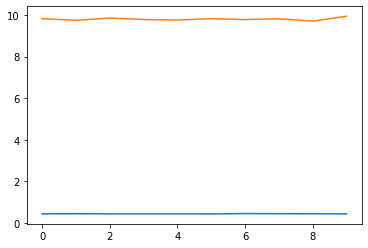

In [159]:


 
clf = model.fit(X_train, y_train, epochs=10)
pred = model.predict(X_test)
plt.plot(clf.history['accuracy'])
plt.plot(clf.history['loss'])

In [157]:
print(clf.history)

{'loss': [9.475361824035645], 'accuracy': [0.43562695384025574]}
